In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random as rand
import operator

Número de funciones computadas del dataset

In [ ]:
dic = {}
for linea in open("/content/drive/MyDrive/TFG/numComputadas.txt"):
    linea.strip()
    funcion, repeticiones = linea.split()
    dic['{:032b}'.format(int(funcion))] = int(repeticiones)

dic = sorted(dic.items(), key=operator.itemgetter(1), reverse = True)
for par in dic[0:15]:
    print('Funcion:', par[0], 'Numero de apariciones:', par[1])

Funciones para la métrica de repetitividad

In [8]:
def leeFunciones(nombreFichero):
    funciones = np.genfromtxt(nombreFichero, dtype = float, usecols=0, unpack=True)
    funcionesStr = np.genfromtxt(nombreFichero, dtype = str, usecols=1, unpack=True)
    return funciones, funcionesStr

def convertirACadena(num):
    return '{:032b}'.format(int(num))

def convertirAInt(cad):
    return int(cad,2);

def puntuacionRepeticiones(segmentos):
    puntuacion = 0
    for elem in set(segmentos):
        apariciones = segmentos.count(elem)
        if apariciones > 1:
            puntuacion += apariciones*len(elem)
    return puntuacion

def repetitividad(s):
    puntRepGlobal = 0
    posActual = 0
    segmentos = []
    for num in [4,4,4,4,4,4,4,4]:
        segmentos.append(s[posActual:posActual+num])
        posActual += num
    return puntuacionRepeticiones(segmentos)

def calculaRepetitividades(funciones):
    return np.array([repetitividad(convertirACadena(s)) for s in funciones])
  
def generaComplementarias(numero):
    generados = 0
    funcComp = []
    while generados < numero:
        funcRand = rand.randint(0, 2**32-1)
        if funcRand not in funciones:
            funcComp.append(funcRand)
            generados += 1
    return funcComp

def muestraDistribuciones(puntuacionesDataSet, puntuacionesComp, titulo = None):
    plt.figure(1)
    plt.hist(puntuacionesDataSet, bins='auto', alpha = 0.5, label='Puntuaciones dataset')
    plt.hist(puntuacionesComp, bins='auto', alpha = 0.5, label='Puntuaciones complementario')
    if titulo != None:
      plt.title(titulo)
    plt.xlabel("Puntuaciones")
    plt.ylabel("Número de repeticiones")
    plt.legend(loc = 'upper right')
    plt.savefig(titulo+'.pdf')
    plt.show()

Lectura de combinaciones para las particiones y funciones del dataset

In [6]:
funciones, _ = leeFunciones('/content/drive/MyDrive/TFG/funcionesSinRepeticion.txt')

## Pruebas de repetitividad

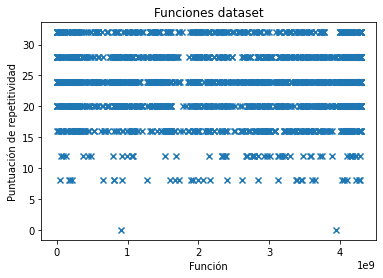

In [9]:
plt.title("Funciones dataset")
plt.xlabel('Función')
plt.ylabel('Puntuación de repetitividad')
muestraData = np.random.choice(funciones, 2000)
puntuacionesRep = calculaRepetitividades(muestraData)
plt.scatter(muestraData, puntuacionesRep, marker = 'x')
plt.savefig('repetitividadesData.pdf')
plt.show()

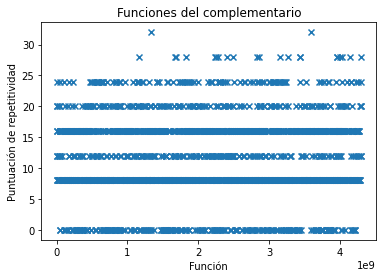

In [10]:
plt.title("Funciones del complementario")
plt.xlabel('Función')
plt.ylabel('Puntuación de repetitividad')
funcComp = generaComplementarias(2000)
puntuacionesRepComp = calculaRepetitividades(funcComp)
plt.scatter(funcComp, puntuacionesRepComp, marker = 'x')
plt.savefig('repetitividadesComp.pdf')
plt.show()

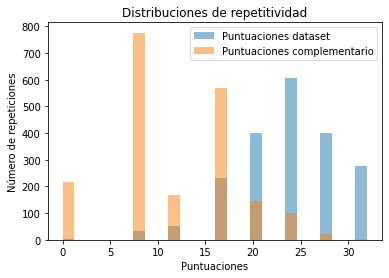

In [11]:
muestraDistribuciones(puntuacionesRep, puntuacionesRepComp, titulo = 'Distribuciones de repetitividad')

In [12]:
mediaData = np.mean(puntuacionesRep)
mediaComp = np.mean(puntuacionesRepComp)
ntest = 2000
muestraDataTest = np.random.choice(funciones, ntest)
puntuacionesRepTest = calculaRepetitividades(muestraDataTest)
porcentajeAciertosData = np.sum(np.abs(puntuacionesRepTest - mediaData) <= np.abs(puntuacionesRepTest - mediaComp))/ntest
print('Porcentaje de aciertos sobre el dataset: ', porcentajeAciertosData*100, '%')
muestraCompTest = generaComplementarias(ntest)
puntuacionesCompTest = calculaRepetitividades(muestraCompTest)
porcentajeAciertosComp = np.sum(np.abs(puntuacionesCompTest - mediaComp) <= np.abs(puntuacionesCompTest - mediaData))/ntest
print('Porcentaje de aciertos sobre el complementario: ', porcentajeAciertosComp*100, '%')

Porcentaje de aciertos sobre el dataset:  82.35 %
Porcentaje de aciertos sobre el complementario:  85.7 %


In [ ]:
mediaData = np.mean(puntuacionesRep)
mediaComp = np.mean(puntuacionesRepComp)
ntest = 500000
muestraDataTest = np.random.choice(funciones, ntest)
puntuacionesRepTest = calculaRepetitividades(muestraDataTest)
porcentajeAciertosData = np.sum(np.abs(puntuacionesRepTest - mediaData) <= np.abs(puntuacionesRepTest - mediaComp))/ntest
print('Porcentaje de aciertos sobre el dataset: ', porcentajeAciertosData*100, '%')
muestraCompTest = generaComplementarias(ntest)
puntuacionesCompTest = calculaRepetitividades(muestraCompTest)
porcentajeAciertosComp = np.sum(np.abs(puntuacionesCompTest - mediaComp) <= np.abs(puntuacionesCompTest - mediaData))/ntest
print('Porcentaje de aciertos sobre el complementario: ', porcentajeAciertosComp*100, '%')

Porcentaje de aciertos sobre el dataset:  82.2076 %
